<img src="https://github.com/Kesterchia/Optimizing-UFC-Betting-Odds-Capstone/blob/main/Pictures/Fight-image.jpg?raw=True" width="500" height="500"> 

# Source:
https://www.kaggle.com/mdabbert/ultimate-ufc-dataset?select=ufc-master.csv

## Context:

This dataset is a merger of a few datasets on Ultimate Fighting Championship (UFC) fights on Kaggle, compiled by Kaggle user Mdabbert (https://www.kaggle.com/mdabbert).

## Content:

This dataset includes:

Rajeev Warrier's excellent dataset (https://www.kaggle.com/rajeevw/ufcdata). This dataset makes up much of the data. It contains data for every UFC bout. The 'red fighter' and 'blue fighter' are improperly recorded prior to around 2010, so that data has been excluded.

Mdabbert's odds dataset (https://www.kaggle.com/mdabbert/ufc-fights-2010-2020-with-betting-odds). This contains gambling odds for each fight.

Mart Jürisoo's Rankings dataset (https://www.kaggle.com/martj42/ufc-rankings). Includes a history of UFC fighter rankings. 

There are 108 columns of data.

## Column descriptions:
R_fighter, B_fighter: Fighter names

R_odds, B_odds: The American odds that the fighter will win. Usually scraped from bestfightodds.com

R_ev, B_ev: The profit on a 100 credit winning bet

date: The date of the fight

location: The location of the fight

country: The country the fight occurs in

Winner: The winner of the fight [Red, Blue, or Draw]

title_bout: Was this a title bout?

weight_class: The weight class of the bout

gender: Gender of the combatants

no_of_rounds: The number of rounds in the fight

B_current_lose_streak, R_current_lose_streak: Current losing streak

B_current_win_streak, R_current_win_streak: Current winning streak

B_draw, R_draw: Number of draws

B_avg_SIG_STR_landed, R_avg_SIG_STR_landed : Significant Strikes Landed per minute

B_avg_SIG_STR_pct, R_avg_SIG_STR_pct: Significant Striking Accuracy

B_avg_SUB_ATT, R_avg_SUB_ATT: Average Submissions Attempted per 15 Minutes

B_avg_TD_landed, R_avg_TD_landed: Average takedowns landed per 15 minutes

B_avg_TD_pct, R_avg_TD_pct: Takedown accuracy

B_longest_win_streak, R_longest_win_streak: Longest winning streak

B_losses, R_losses: Total number of losses

B_total_rounds_fought, R_total_rounds_fought: Total rounds fought

B_total_title_bouts, R_total_title_bouts: Total number of title bouts

B_win_by_Decision_Majority, R_win_by_Decision_Majority: Wins by Majority Decision

B_win_by_Decision_Split, R_win_by_Decision_Split: Wins by Split Decision

B_win_by_Decision_Unanimous, R_win_by_Decision_Unanimous: Wins by Unanimous Decision

B_win_by_KO/TKO, R_win_by_KO/TKO: Wins by KO/TKO

B_win_by_Submission, R_win_by_Submission: Wins by Submission

B_win_by_TKO_Doctor_Stoppage, R_win_by_TKO_Doctor_Stoppage: Wins by Doctor Stoppage

B_wins, R_wins: Total career wins

B_Stance, R_stance: Fighter stance

B_Height_cms, R_Height_cms: Fighter height in cms

B_Reach_cms, R_Reach_cms: Fighter reach in cms

B_Weight_lbs, R_Weight_lbs: Fighter weight in pounds

B_age, R_age: Fighter age

lose_streak_dif: (Blue lose streak) - (Red lose streak) winstreakdif: (Blue win streak) - (Red win streak)

longest_win_streak_dif: (Blue longest win streak) - (Red longest win streak)

win_dif: (Blue wins) - (Red wins)

loss_dif: (Blue losses) - (Red losses)

total_round_dif: (Blue total rounds fought) - (Red total rounds fought)

total_title_bout_dif: (Blue number of title fights) - (Red number of title fights)

ko_dif: (Blue wins by KO/TKO) - (Red wins by KO/TKO)

sub_dif: (Blue wins by submission) - (Red wins by submission)

height_dif: (Blue height) - (Red height) in cms

reach_dif: (Blue reach) - (Red reach) in cms

age_dif: (Blue age) - (Red age)

sig_str_dif: (Blue sig strikes per minute) - (Red sig strikes per minute)

avg_sub_att_dif: (Blue submission attempts) - (Red submission attempts)

avg_td_dif: (Blue TD attempts) - (Red TD attempts)

empty_arena: Did this fight occur in an empty arena? (1,0)

constant_1: The number 1

B_match_weightclass_rank, R_match_weightclass_rank: Rank in the weightclass this bout takes place in

R_Women's Flyweight_rank, B_Women's Flyweight_rank: Rank in the Women's Flyweight Division

B_Women's Featherweight_rank, 'RWomen's Featherweightrank: Rank in the Women's Featherweight Division BWomen's 
Strawweightrank, 'R_Women's Strawweight_rank: Rank in the Women's Strawweight Division

B_Women's Bantamweight_rank, R_Women's Bantamweight_rank: Rank in the Women's Bantamweight Division

B_Heavyweight_rank, R_Heavyweight_rank: Heavyweight rank

B_Light Heavyweight_rank, R_Light Heavyweight rank: Light Heavyweight rank

B_Middleweight_rank, R_Middleweight_rank: Middleweight rank

B_Welterweight_rank, R_Welterweight_rank: Welterweight rank

B_Lightweight_rank, R_Lightweight_rank: Lightweight rank

B_Featherweight_rank, R_Featherweight_rank: Featherweight rank

B_Bantamweight_rank, R_Bantamweight_rank: Bantamweight rank

B_Flyweight_rank, R_Flyweight_rank: Flyweight rank

B_Pound-for-Pound_rank, R_Pound-for-Pound_rank: Pound-for-Pound rank

better_rank: Who has the better rank (Red, Blue, neither)

finish: How the fight finished

finish_details: More details about the finish if available.

finish_round: The round the fight ended

finish_round_time: Time in the round of the finish

total_fight_time_secs: Total time of the fight in seconds

# 1: Importing libraries and dataset

In [159]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

from pandas_profiling import ProfileReport

In [160]:
#Import in the dataset
df = pd.read_csv('./Data/ufc-master.csv')

df.head()

,R_fighter,B_fighter,R_odds,B_odds,R_ev,B_ev,date,location,country,Winner,...,R_td_attempted_bout,B_td_attempted_bout,R_td_pct_bout,B_td_pct_bout,R_sub_attempts_bout,B_sub_attempts_bout,R_pass_bout,B_pass_bout,R_rev_bout,B_rev_bout
0,Deiveson Figueiredo,Alex Perez,-286,225,34.965035,225.000000,11/21/2020,"Las Vegas, Nevada, USA",USA,Red,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Valentina Shevchenko,Jennifer Maia,-1667,850,5.998800,850.000000,11/21/2020,"Las Vegas, Nevada, USA",USA,Red,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Mike Perry,Tim Means,-150,120,66.666667,120.000000,11/21/2020,"Las Vegas, Nevada, USA",USA,Blue,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Katlyn Chookagian,Cynthia Calvillo,205,-265,205.000000,37.735849,11/21/2020,"Las Vegas, Nevada, USA",USA,Red,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Mauricio Rua,Paul Craig,150,-190,150.000000,52.631579,11/21/2020,"Las Vegas, Nevada, USA",USA,Blue,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 3: Exploratory Data Analysis/ Visualization

Here we do some quick EDA to see basic patterns, but nothing too fancy.

### Checking for balance of target variable:

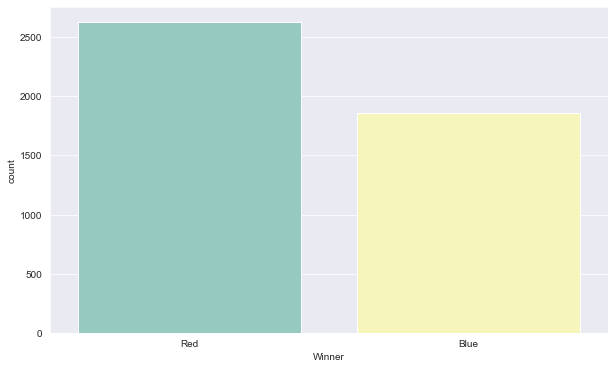

In [338]:
sns.set_style(style = 'darkgrid')
plt.figure(figsize = (10,6))

fig = sns.countplot(df['Winner'], palette = 'Set3')

Data is pretty balanced with both red and blue wins.

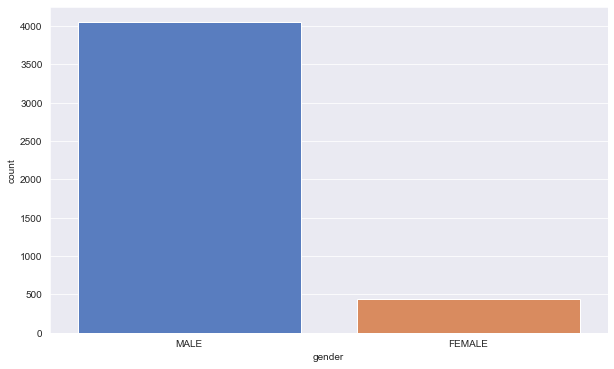

In [339]:
plt.figure(figsize = (10,6))
fig = sns.countplot(df['gender'], palette = 'muted')

Data is very imbalanced in gender, which is expected since MMA is male-dominated. However styles of fighting don't differ significantly between genders, so model predictions should not be too affected by the imbalance.

# 2: Data cleaning and preprocessing:

In [161]:
#See some quick info:
df.info(max_cols = 200)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4485 entries, 0 to 4484
Data columns (total 137 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   R_fighter                     4485 non-null   object 
 1   B_fighter                     4485 non-null   object 
 2   R_odds                        4485 non-null   int64  
 3   B_odds                        4485 non-null   int64  
 4   R_ev                          4485 non-null   float64
 5   B_ev                          4485 non-null   float64
 6   date                          4485 non-null   object 
 7   location                      4485 non-null   object 
 8   country                       4485 non-null   object 
 9   Winner                        4485 non-null   object 
 10  title_bout                    4485 non-null   bool   
 11  weight_class                  4485 non-null   object 
 12  gender                        4485 non-null   object 
 13  no

The columns such as 'B_Women's Flyweight_rank', 'B_Women's Strawweight_rank' are irrelevant, as we already have the weight class and respective fighter rank as columns of their own. Therefore these columns will be dropped.



In [162]:
df = df.drop(labels = df.columns[81:107],
             axis = 1)

#Remaining data:
df.info(max_cols = 150)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4485 entries, 0 to 4484
Data columns (total 111 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   R_fighter                     4485 non-null   object 
 1   B_fighter                     4485 non-null   object 
 2   R_odds                        4485 non-null   int64  
 3   B_odds                        4485 non-null   int64  
 4   R_ev                          4485 non-null   float64
 5   B_ev                          4485 non-null   float64
 6   date                          4485 non-null   object 
 7   location                      4485 non-null   object 
 8   country                       4485 non-null   object 
 9   Winner                        4485 non-null   object 
 10  title_bout                    4485 non-null   bool   
 11  weight_class                  4485 non-null   object 
 12  gender                        4485 non-null   object 
 13  no

Now we store our variables in X and y:

In [163]:
y = df['Winner'].copy()
X = df.drop(labels = 'Winner', axis = 1).copy()

#Split variables into numeric and categorical:

X_numeric = X.select_dtypes(exclude = 'object').copy()
X_cat = X.select_dtypes(include = 'object').copy()

## 2.1: Categorical variables

### Impute time-related variables in X_cat:

In [166]:
#Our finishing time in round is stored as an object, the wrong datatype:

X_cat.loc[:,'finish_round_time'] 

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
4480    0:44
4481    2:01
4482    0:47
4483    5:00
4484    5:00
Name: finish_round_time, Length: 4485, dtype: object

In [167]:
#First we have to convert it to hh:mm:ss format:

X_cat.loc[:,'finish_round_time'] = '00:0' + X_cat.loc[:,'finish_round_time']
X_cat.loc[:,'finish_round_time']

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
4480    00:00:44
4481    00:02:01
4482    00:00:47
4483    00:05:00
4484    00:05:00
Name: finish_round_time, Length: 4485, dtype: object

In [168]:
#Now we can convert it to a timedelta object

X_cat.loc[:,'finish_round_time'] = pd.to_timedelta(X_cat.loc[:,'finish_round_time'])
X_cat.loc[:,'finish_round_time']

0           NaT
1           NaT
2           NaT
3           NaT
4           NaT
         ...   
4480   00:00:44
4481   00:02:01
4482   00:00:47
4483   00:05:00
4484   00:05:00
Name: finish_round_time, Length: 4485, dtype: timedelta64[ns]

In [169]:
#Finally we store it in seconds instead:

X_cat.loc[:,'finish_round_time'] = X_cat.loc[:,'finish_round_time'].dt.seconds
X_cat.loc[:,'finish_round_time'] #Note it becomes stored in float format

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
        ...  
4480     44.0
4481    121.0
4482     47.0
4483    300.0
4484    300.0
Name: finish_round_time, Length: 4485, dtype: float64

Now we can impute the null values. Before that we should look at how it is distributed:

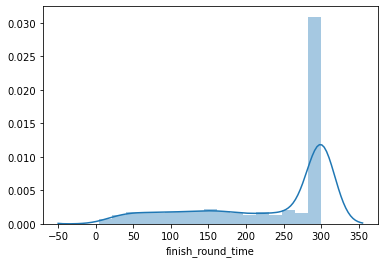

In [170]:
#Now we can impute the values. Before that we see how it is distributed:

sns.distplot(X_cat.loc[:,'finish_round_time'])

Since it's pretty skewed, we should use a robust measure to impute instead (the median). 

In [171]:
from sklearn.impute import SimpleImputer

simple_imputer = SimpleImputer(strategy = 'median')

#Impute values:
X_cat.loc[:,'finish_round_time'] = simple_imputer.fit_transform(X_cat[['finish_round_time']])

#Check for null values:
X_cat['finish_round_time'].isnull().sum()

0

Now we should move the variable to the X_numeric table instead:

In [172]:
#Move the column over:

X_numeric['finish_round_time'] = X_cat['finish_round_time']
X_cat = X_cat.drop('finish_round_time', axis = 1)

### Impute remaining categorical variables in X_cat:

In [173]:
#Check which columns still have null values:

X_cat.isnull().any()

R_fighter         False
B_fighter         False
date              False
location          False
country           False
weight_class      False
gender            False
B_Stance          False
R_Stance          False
better_rank       False
finish             True
finish_details     True
dtype: bool

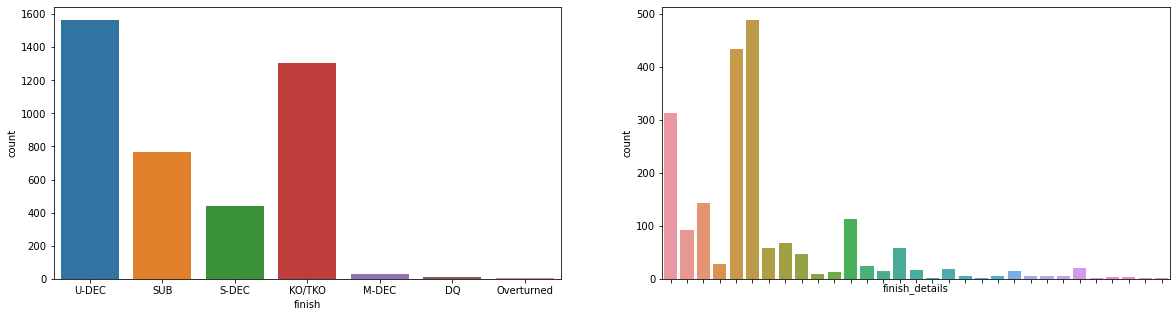

In [174]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 5))

#Plot for 'finish':

sns.countplot(X_cat['finish'], ax = ax[0])

#Plot for 'finish_details'

sns.countplot(X_cat['finish_details'], ax = ax[1])
ax[1].tick_params(axis = 'x', labelbottom = False) #Hide the bottom labels so it doesn't look too messy

Using the mode to impute the missing values doesn't seem like an appropriate approach for these two variables, especially 'finish_details'. Therefore we will be conservative and just leave the missing values as they are:

In [175]:
#Fill in the null values with a simple 'Missing' string:
X_cat.loc[:,'finish'] = X_cat['finish'].fillna(value = 'Missing')
X_cat.loc[:,'finish_details'] = X_cat['finish_details'].fillna(value = 'Missing')

#Ensure there are no remaining null values:
X_cat.isnull().sum()

#Rename the imputed dataframe for clarity:
X_cat_imputed = X_cat

In [220]:
X_cat_imputed.head()

,location,country,weight_class,gender,B_Stance,R_Stance,better_rank,finish,finish_details
0,"Las Vegas, Nevada, USA",USA,Flyweight,MALE,Orthodox,Orthodox,Red,Missing,Missing
1,"Las Vegas, Nevada, USA",USA,Women's Flyweight,FEMALE,Orthodox,Southpaw,Red,Missing,Missing
2,"Las Vegas, Nevada, USA",USA,Welterweight,MALE,Orthodox,Orthodox,neither,Missing,Missing
3,"Las Vegas, Nevada, USA",USA,Women's Flyweight,FEMALE,Orthodox,Orthodox,Red,Missing,Missing
4,"Las Vegas, Nevada, USA",USA,Light Heavyweight,MALE,Orthodox,Orthodox,Red,Missing,Missing


### Encoding categorical variables:

In [215]:
X_cat_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4485 entries, 0 to 4484
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   R_fighter       4485 non-null   object
 1   B_fighter       4485 non-null   object
 2   date            4485 non-null   object
 3   location        4485 non-null   object
 4   country         4485 non-null   object
 5   weight_class    4485 non-null   object
 6   gender          4485 non-null   object
 7   B_Stance        4485 non-null   object
 8   R_Stance        4485 non-null   object
 9   better_rank     4485 non-null   object
 10  finish          4485 non-null   object
 11  finish_details  4485 non-null   object
dtypes: object(12)
memory usage: 420.6+ KB


First we drop the columns that we are fairly certain have no impact on winning outcome:

In [216]:
#Drop fighter names and fight dates:

X_cat_imputed = X_cat_imputed.drop(['R_fighter','B_fighter','date'], axis = 1)

#Check our columns again:

X_cat_imputed.info()

To prevent ending up with a high dimensional dataframe (if one-hot encoding was used), the choice here will be binary encoding. The categories are numerically encoded, converted to binary form and finally expressed through separate columns.

In [221]:
from category_encoders.binary import BinaryEncoder
X_cat_imputed_encoded = BinaryEncoder().fit_transform(X_cat_imputed)

#View the encoded table:
X_cat_imputed_encoded.head()

,location_0,location_1,location_2,location_3,location_4,location_5,location_6,location_7,location_8,country_0,...,finish_0,finish_1,finish_2,finish_3,finish_details_0,finish_details_1,finish_details_2,finish_details_3,finish_details_4,finish_details_5
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1


## 2.2: Numerical variables

### Impute numerical variables in X_numeric:

Check the how many columns have null values:

In [164]:
nullcols = df.columns[df.isnull().any(axis=0)]

len(nullcols)

41

There are too many columns to have a different imputing strategy for each, so we will use sklearn's iterative imputer to impute the missing values. It goes through each column and returns predictions for missing values based on all other columns. After going through all variables, it repeats the cycle for a number of iterations.

The default strategy for the iterative imputer is to use a Bayesian Ridge Regression, an alternative to OLS.

Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.impute.IterativeImputer.html#sklearn.impute.IterativeImputer

In [177]:
%%time
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imputer = IterativeImputer(estimator = None, #Default bayesian ridge
                           max_iter = 100)

#Impute values:
X_numeric_imputed = pd.DataFrame(data = imputer.fit_transform(X_numeric),
                                 columns = X_numeric.columns)

Wall time: 4min 56s


D:\Tools\Anaconda\lib\site-packages\sklearn\impute\_iterative.py:669: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn("[IterativeImputer] Early stopping criterion not"


### Scale the numerical variables:

In [178]:
X_numeric_imputed.shape

(4485, 98)

In [179]:
#Initialize an iterator:
import itertools

iterator = itertools.product(range(10), range(10))

D:\Tools\Anaconda\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
D:\Tools\Anaconda\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
D:\Tools\Anaconda\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
D:\Tools\Anaconda\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
D:\Tools\Anaconda\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
D:\Tools\Anaconda\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping dens

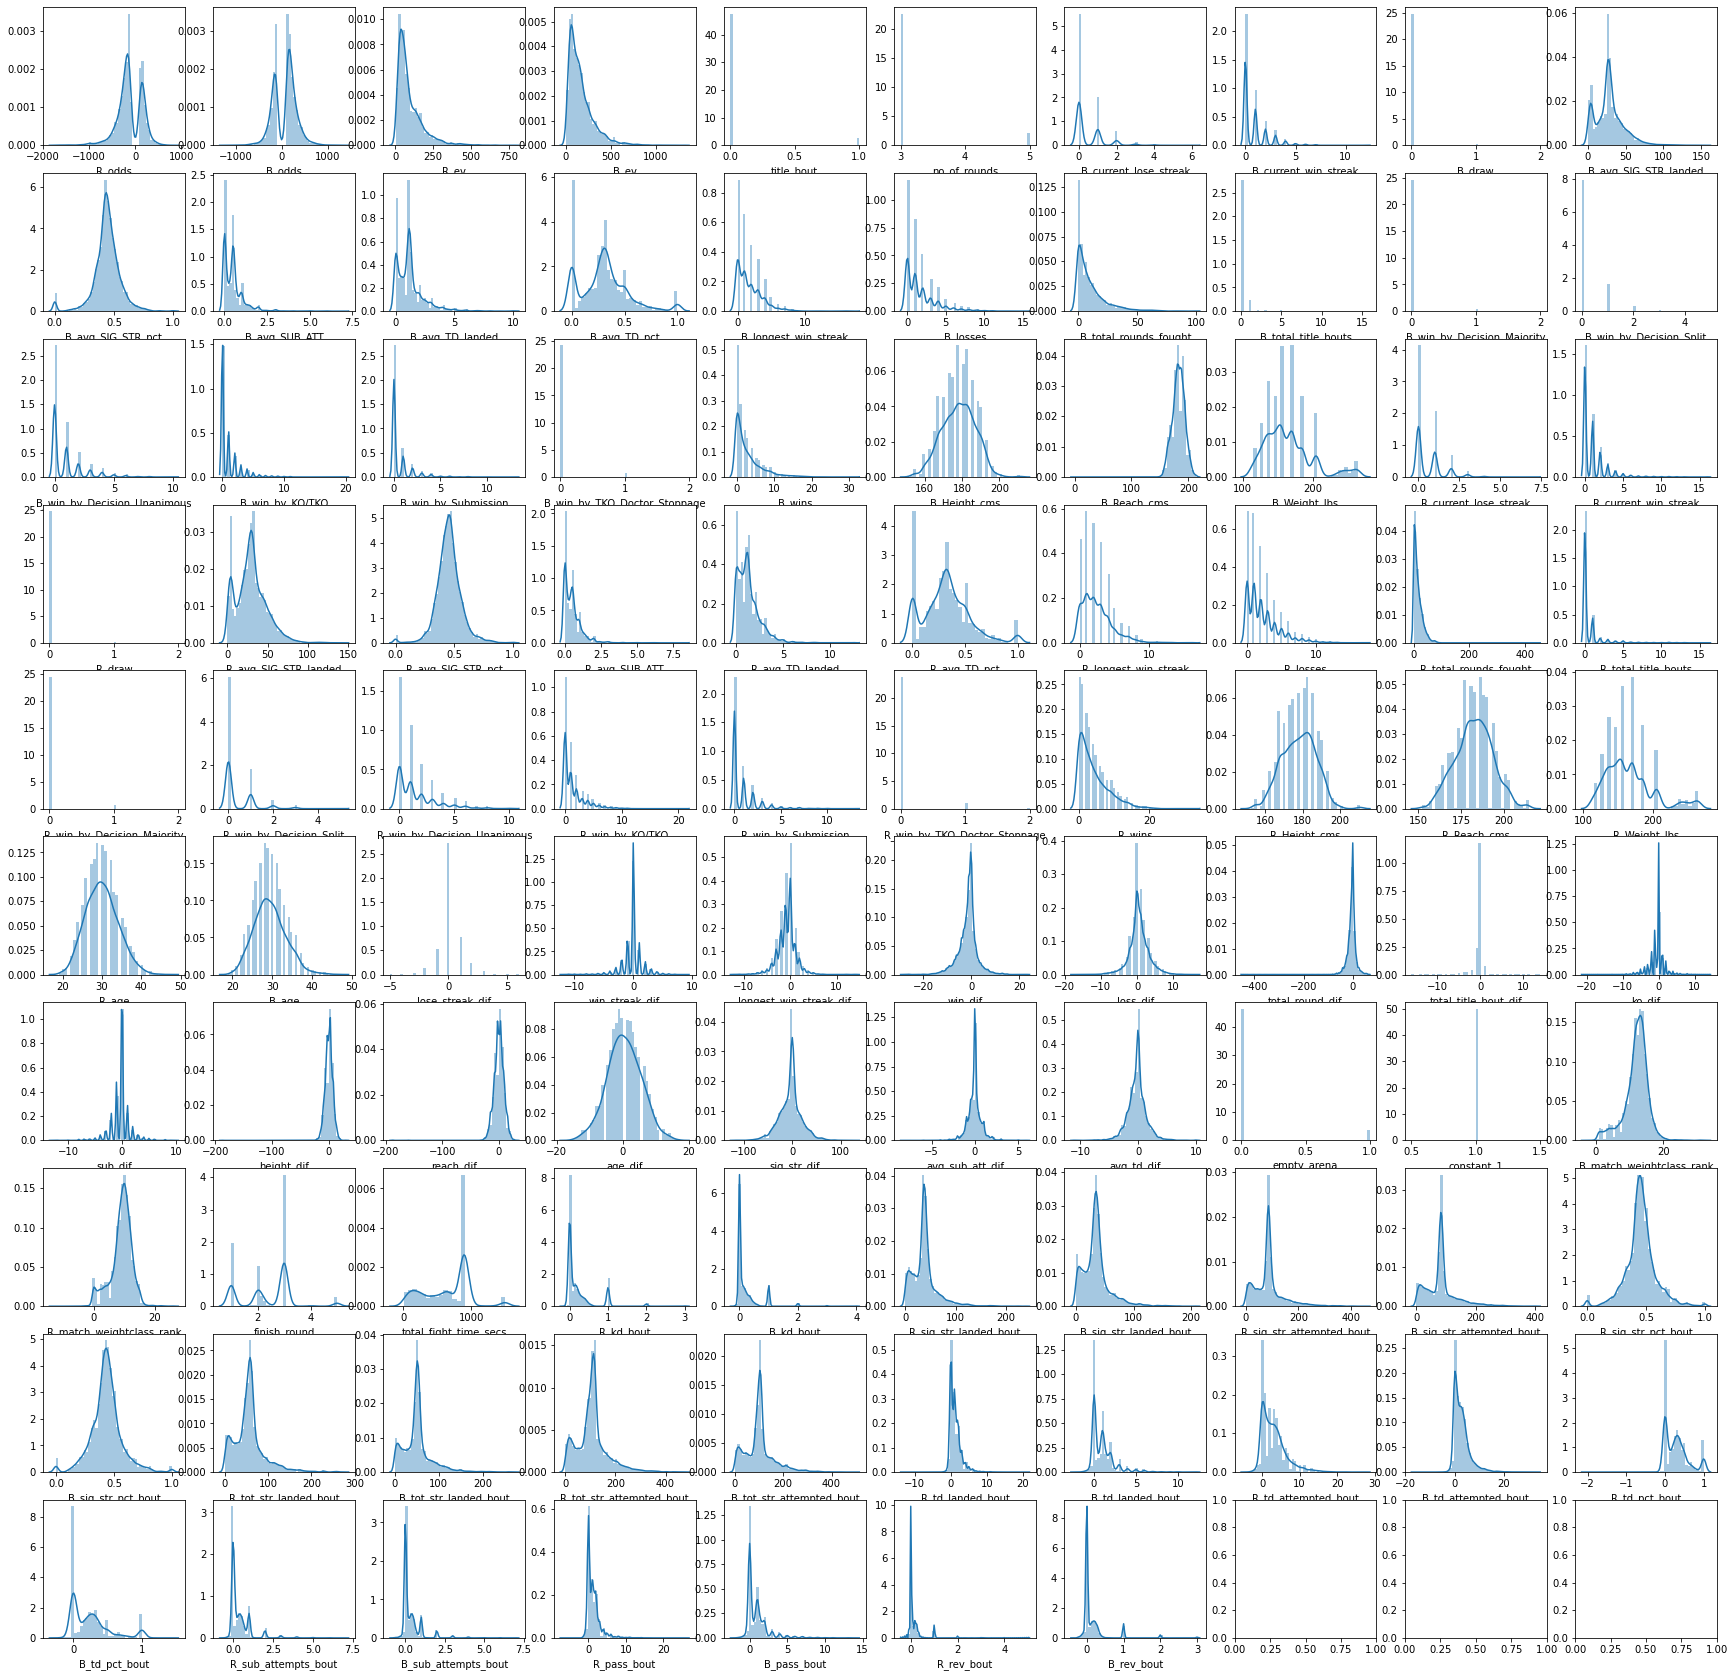

In [180]:
#Before scaling we first check the distribution of the variables:

fig, ax = plt.subplots(nrows = 10,
                       ncols = 10,
                      figsize = (30,30))


for i in range(97):
    axis = next(iterator)
    sns.distplot(X_numeric_imputed.iloc[:,i],
                 ax = ax[axis[0]][axis[1]]
                )

Alot of the data definitely seems skewed, so we will use a robust scaler instead of the standard scaler. This just means more robust measures like medians/inter-quartile ranges will be used instead of the typical mean/standard deviation.

In [181]:
from sklearn.preprocessing import RobustScaler

robustscaler = RobustScaler()

#Scale the data:
X_numeric_imputed_scaled = pd.DataFrame(robustscaler.fit_transform(X_numeric_imputed),
                                        columns = X_numeric.columns)

#Check a few rows of the scaled data:
X_numeric_imputed_scaled.head()

,R_odds,B_odds,R_ev,B_ev,title_bout,no_of_rounds,B_current_lose_streak,B_current_win_streak,B_draw,B_avg_SIG_STR_landed,...,B_td_attempted_bout,R_td_pct_bout,B_td_pct_bout,R_sub_attempts_bout,B_sub_attempts_bout,R_pass_bout,B_pass_bout,R_rev_bout,B_rev_bout,finish_round_time
0,-0.348718,0.256757,-0.346320,0.608840,0.0,2.0,0.0,3.0,0.0,-1.083819,...,0.520892,0.384757,0.069578,1.242531,0.276176,0.115162,0.276789,0.465076,1.920559,0.0
1,-3.889744,1.945946,-0.662758,4.614365,0.0,0.0,0.0,1.0,0.0,-1.114234,...,-0.333999,0.262596,-0.545156,0.155835,-0.480948,0.615509,-0.855204,-0.045141,0.708929,0.0
2,0.000000,-0.027027,0.000000,-0.064088,0.0,0.0,0.0,1.0,0.0,-1.071653,...,0.048383,-0.026220,-0.160840,0.183168,0.455213,-0.010214,0.004867,1.109659,0.056151,0.0
3,0.910256,-1.067568,1.511204,-0.591306,0.0,0.0,0.0,3.0,1.0,-1.107644,...,0.613056,-0.271043,0.261625,0.511729,0.198860,-0.200146,0.170346,0.906949,0.673673,0.0
4,0.769231,-0.864865,0.910364,-0.495842,0.0,0.0,0.0,2.0,1.0,-1.204464,...,0.828344,-0.427459,0.588343,-0.527732,3.236191,-0.493768,1.982333,2.547966,1.731762,0.0


## Dummy encode the target variable:

In [182]:
#Convert to dummy variables:

pd.get_dummies(y).head()

,Blue,Red
0,0,1
1,0,1
2,1,0
3,0,1
4,1,0


In [310]:
#We only need to keep one for the analysis:

y = pd.get_dummies(y)['Red']

#Rename column for clarity:

y = y.rename('Red_winner')

KeyError: 'Red'

### Rejoin our numerical and categorical dataframes:

In [224]:
clean_df = pd.concat([X_cat_imputed_encoded, X_numeric_imputed_scaled], axis = 1, join = 'inner')

print('Merged dataframe shape:',cleaned_df.shape)
print('Columns with null values:',cleaned_df.isnull().any().sum())

Merged dataframe shape: (4485, 140)
Columns with null values: 0


In [225]:
#See a few rows of our cleaned and scaled data:

clean_df.head()

,location_0,location_1,location_2,location_3,location_4,location_5,location_6,location_7,location_8,country_0,...,B_td_attempted_bout,R_td_pct_bout,B_td_pct_bout,R_sub_attempts_bout,B_sub_attempts_bout,R_pass_bout,B_pass_bout,R_rev_bout,B_rev_bout,finish_round_time
0,0,0,0,0,0,0,0,0,1,0,...,0.520892,0.384757,0.069578,1.242531,0.276176,0.115162,0.276789,0.465076,1.920559,0.0
1,0,0,0,0,0,0,0,0,1,0,...,-0.333999,0.262596,-0.545156,0.155835,-0.480948,0.615509,-0.855204,-0.045141,0.708929,0.0
2,0,0,0,0,0,0,0,0,1,0,...,0.048383,-0.026220,-0.160840,0.183168,0.455213,-0.010214,0.004867,1.109659,0.056151,0.0
3,0,0,0,0,0,0,0,0,1,0,...,0.613056,-0.271043,0.261625,0.511729,0.198860,-0.200146,0.170346,0.906949,0.673673,0.0
4,0,0,0,0,0,0,0,0,1,0,...,0.828344,-0.427459,0.588343,-0.527732,3.236191,-0.493768,1.982333,2.547966,1.731762,0.0


# 4: Feature selection

#### Principal component analysis:

PCA is chosen as the main feature selection choice here instead of other methods like Recursive Feature elimination as many variables here are likely highly correlated (eg. strikes landed per round and strikes attempted per round).

PCA can remove some of that multicollinearity, and maybe after that an RFE can be implemented.

In [229]:
from sklearn.decomposition import PCA

pca = PCA(n_components = None) #Default setting keeps all components

#Fit the PCA transformer
pca.fit(clean_df)

pca_df = pd.DataFrame(pca.transform(clean_df), 
                      columns = ['Component {}'.format(i+1) for i in range(len(clean_df.columns))])

#Take a look at the transformed data:
pca_df.head()

,Component 1,Component 2,Component 3,Component 4,Component 5,Component 6,Component 7,Component 8,Component 9,Component 10,...,Component 131,Component 132,Component 133,Component 134,Component 135,Component 136,Component 137,Component 138,Component 139,Component 140
0,3.365957,1.449649,1.421770,3.002781,1.249512,-2.155030,0.124297,1.883992,-1.067521,-2.256348,...,-8.956326e-17,-3.917651e-16,-3.687254e-16,-1.688612e-16,9.423894e-17,1.431241e-16,-6.873832e-16,-3.733431e-16,-2.110291e-16,1.728110e-16
1,5.711048,4.117339,-1.209530,1.459259,6.969505,-3.643665,1.615600,1.489362,-0.128660,0.080895,...,1.698148e-17,-4.518459e-16,-4.717054e-16,5.721480e-17,1.156360e-16,1.955851e-16,3.445811e-16,-8.280132e-17,-1.239424e-15,3.949803e-17
2,2.402121,0.120708,6.335492,0.465243,-3.375790,-0.031264,-0.120813,-2.504279,0.297882,-0.333683,...,3.517466e-16,6.627457e-17,3.820375e-16,-3.685489e-16,-1.416928e-16,1.014308e-16,-4.366436e-16,-1.138308e-17,-1.263616e-16,1.095550e-15
3,1.631808,-0.301112,1.759227,-0.024083,-4.761303,-2.150389,2.218187,2.802446,-1.049526,-2.045990,...,7.041853e-16,-1.282337e-15,-1.327515e-16,-1.522967e-16,-7.693382e-17,4.141007e-16,3.424601e-17,-1.936637e-17,-1.016399e-16,3.632785e-16
4,7.691667,10.474891,-11.964110,1.353973,-8.751643,-12.917117,-4.884484,-6.328906,3.612306,-3.197965,...,4.148170e-15,-1.361903e-15,-1.790277e-15,9.602340e-16,5.305661e-16,-2.280536e-15,3.602078e-16,-1.221865e-16,6.084716e-16,-1.610328e-15


We are able to view how much variance each Principle Component explains in the data:

In [264]:
#See the explained ratio for the first 5 components:

pca.explained_variance_ratio_[:5]

array([0.10548463, 0.09423553, 0.08748491, 0.06047549, 0.05535352])

In [249]:
#Create a function to decide how many components to keep:


def keep_components(array, variance):
    n = 1
    while sum(array[:n]) < variance:
        n += 1
    print('{} out of {} components should be kept to explain {} variance'.format(n,len(array),variance))
    

In [250]:
#In this analysis we choose to retain enough variables to explain 95% variance:
keep_components(pca.explained_variance_ratio_, 0.95)

56 out of 140 components should be kept to explain 0.95 variance


In [259]:
#Therefore we keep 56 components:

pca = PCA(n_components = 56)

pca_df = pd.DataFrame(pca.fit_transform(clean_df), 
                      columns = ['Component {}'.format(i+1) for i in range(pca.n_components)])

### Recursive Feature elimination:

In RFE, we use an estimator that assigns class weights (eg. Regression) and 'prune' away variables that have the lowest importance relative to the target.

In this case the estimator we use is a support vector machine, and we prune it from 56 components down to 30. The number 30 is an arbitrary choice. If our model performs poorly later, we can consider pruning less variables.

In [275]:
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

svc = SVC(kernel = 'linear') #The linear kernel gives feature importances, unlike the rbf kernel

rfe = RFE(estimator = LinearRegression(),
          n_features_to_select = 30,
          step = 1)

rfe.fit(pca_df, y)

#See how they rank each component according to how much variance in y they explain:
rfe.ranking_

array([21, 23,  1,  9,  1,  1,  1,  1,  1,  1,  1,  1,  1, 11, 20,  1, 26,
        1, 15,  4, 27,  1,  1, 17,  1,  3,  1, 24, 16,  5, 12, 18,  1,  1,
       19,  1,  1,  7, 25,  1,  1, 14,  1,  1,  1,  1,  1, 10,  2,  1,  1,
        8,  1,  6, 13, 22])

The results are strange! The first few components that explain the most variance are actually ranked poorly by the RFE estimator. We will try fitting ML models on both the normal PCA data and also PCA data pruned by RFE and see which gives us better results.

In [277]:
#Transform our data:

rfe_df = pd.DataFrame(rfe.transform(pca_df))

#Double check the shapes of both our datasets:

print('Shape of dataframe after PCA:', pca_df.shape)
print('Shape of dataframe after PCA and RFE:', rfe_df.shape)

Shape of dataframe after PCA: (4485, 56)
Shape of dataframe after PCA and RFE: (4485, 30)


# 3: Implementing models!

First we split our models into training and testing data:

In [293]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(pca_df, y, test_size=0.2, random_state=42)

Implement all kinds of models to try to predict winners!

In [297]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

### Logistic Regression:

In [298]:
#Use GridSearch to look for a good set of parameters:

logmodel = GridSearchCV(estimator = LogisticRegression(penalty = 'l2'), #Ridge regression so we don't eliminate coefficients
                        param_grid = {'C' : [0.01,0.1,1.0], #Regularization parameter
                                      'solver': ['newton-cg','lbfgs','liblinear']
                                     }
                       )
logmodel.fit(X_train,y_train)
logmodel_predictions = logmodel.predict(X_test)

### Support vector machines:

In [300]:
svcmodel = GridSearchCV(estimator = SVC(),
                        param_grid = {'kernel': ['linear','poly','rbf'],
                                      'C': [0.01,0.1,1.0]
                                     }
                       )
svcmodel.fit(X_train,y_train)
svcmodel_predictions = svcmodel.predict(X_test)

### Random forest:

In [303]:
from sklearn.ensemble import RandomForestClassifier

forestmodel = GridSearchCV(estimator = RandomForestClassifier(),
                         param_grid = {'n_estimators': [100,200,400,800],
                                       'max_depth': [None], #Don't set limit for tree depth
                                      }
                        )

forestmodel.fit(X_train,y_train)
forestmodel_predictions = forestmodel.predict(X_test)

NameError: name 'treemodel' is not defined

# Compare results using 1. PCA, 2. PCA + RFE, 3. Normal features

# Final tool should be:

1. Pass in parameters
2. Return the odds so that the organizer can BREAK EVEN (returns = 0)